## Importing Libraries and models

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

## Loading Data set

In [2]:
df=pd.read_csv('californiahousing.csv')

# EDA

In [3]:
df.head(8)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY


### Analyze the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### Removing duplicates and missing values  

In [6]:
a=df['total_bedrooms'].mean()
df['total_bedrooms']=df['total_bedrooms'].fillna(a)   #filling missing values

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
df.duplicated().sum()   #Checking any duplicates

np.int64(0)

### Plotting

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

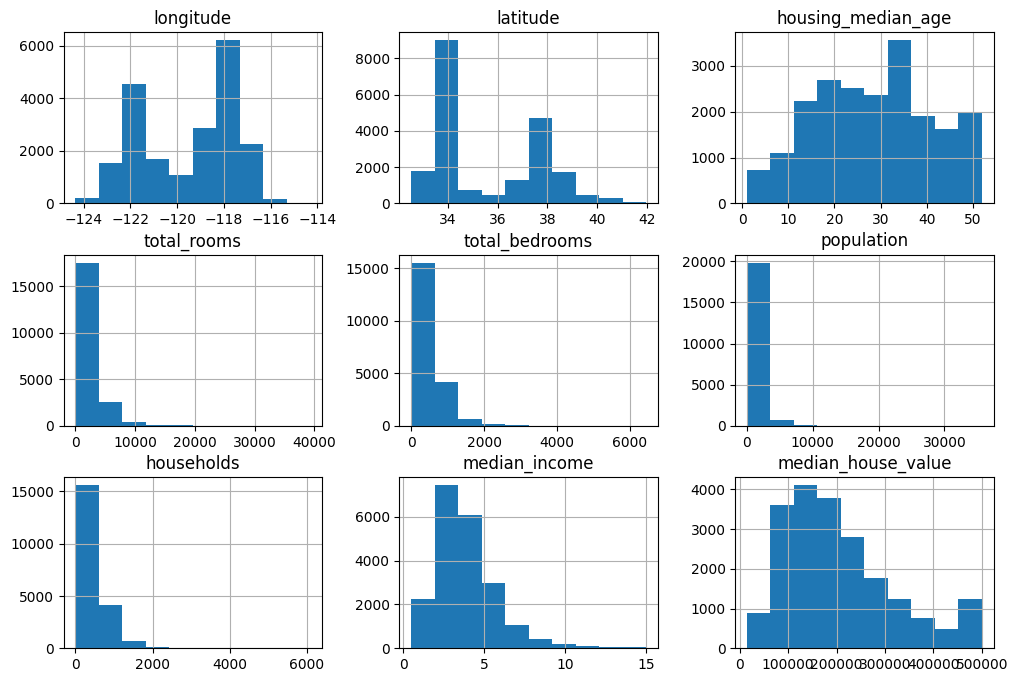

In [9]:
df.hist(figsize=(12,8))  #feature distributions

<Axes: xlabel='median_house_value', ylabel='Count'>

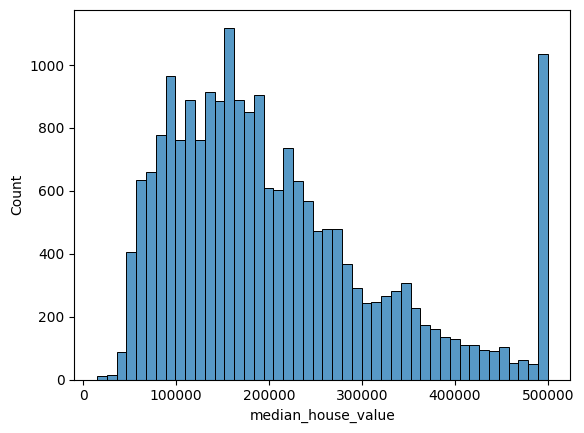

In [10]:
sns.histplot(df['median_house_value'])  #target variable analysis

<Axes: xlabel='median_house_value'>

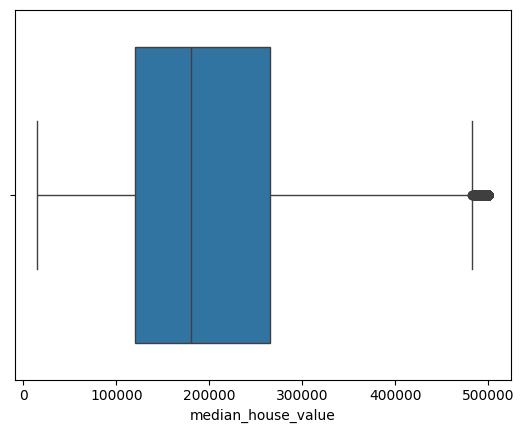

In [11]:
sns.boxplot(x=df['median_house_value'])    #outliers detection

<Axes: xlabel='median_house_value', ylabel='ocean_proximity'>

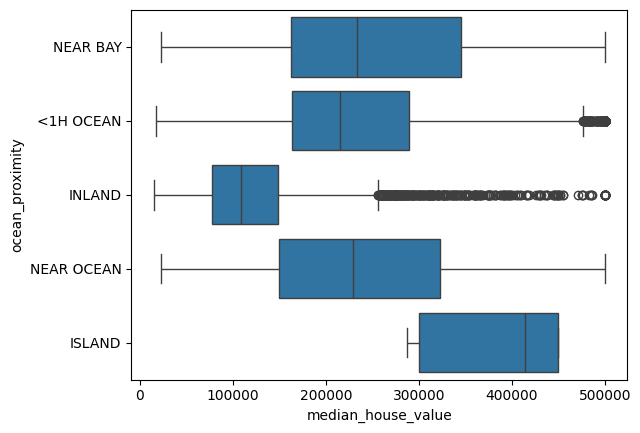

In [12]:
sns.boxplot(y='ocean_proximity', x='median_house_value', data=df)  # ocean_prox. outliers per median_house value

In [13]:
df=df.join(pd.get_dummies(df.ocean_proximity,dtype=float)).drop(['ocean_proximity'],axis=1)

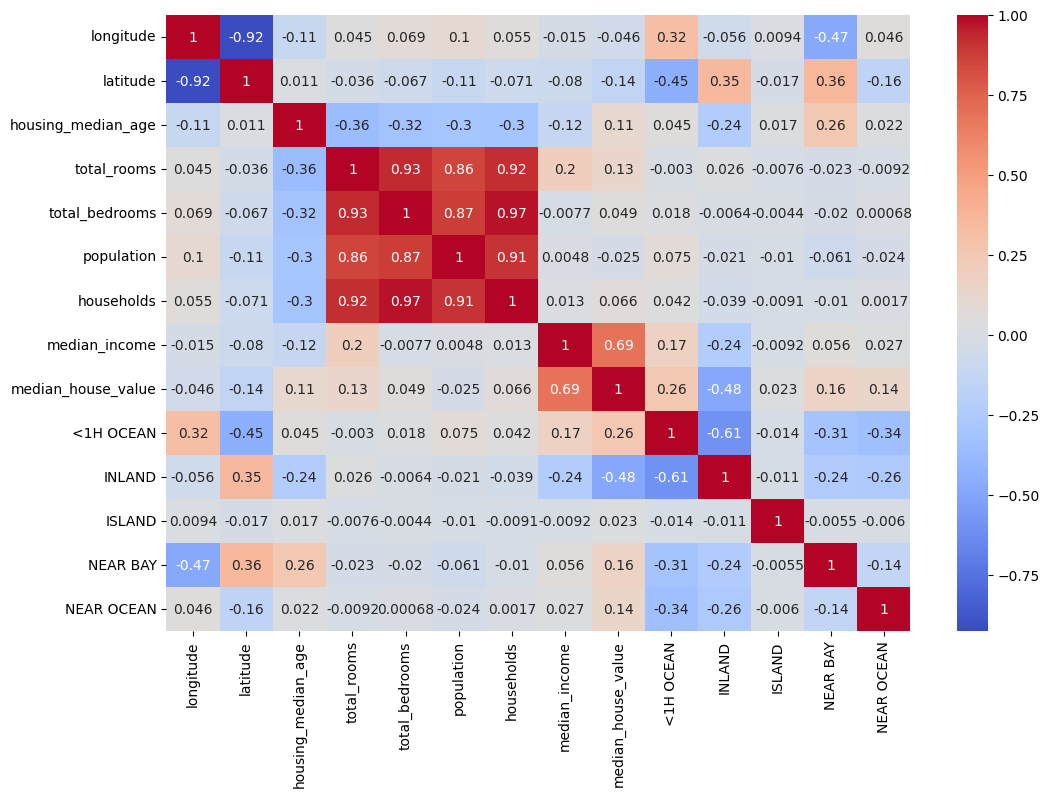

In [14]:
plt.figure(figsize=(12,8))
df.corr()                                                 #Correlation
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()

<Axes: xlabel='median_income', ylabel='median_house_value'>

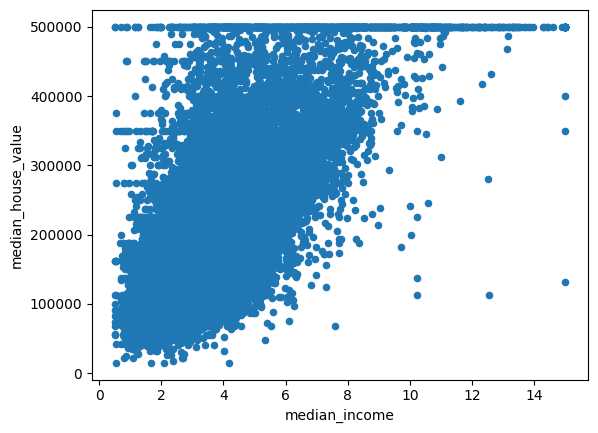

In [15]:
df.plot(kind="scatter",y="median_house_value",x="median_income")

array([[<Axes: xlabel='longitude', ylabel='longitude'>,
        <Axes: xlabel='latitude', ylabel='longitude'>,
        <Axes: xlabel='median_house_value', ylabel='longitude'>,
        <Axes: xlabel='total_rooms', ylabel='longitude'>],
       [<Axes: xlabel='longitude', ylabel='latitude'>,
        <Axes: xlabel='latitude', ylabel='latitude'>,
        <Axes: xlabel='median_house_value', ylabel='latitude'>,
        <Axes: xlabel='total_rooms', ylabel='latitude'>],
       [<Axes: xlabel='longitude', ylabel='median_house_value'>,
        <Axes: xlabel='latitude', ylabel='median_house_value'>,
        <Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>],
       [<Axes: xlabel='longitude', ylabel='total_rooms'>,
        <Axes: xlabel='latitude', ylabel='total_rooms'>,
        <Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>]], dtype=object)

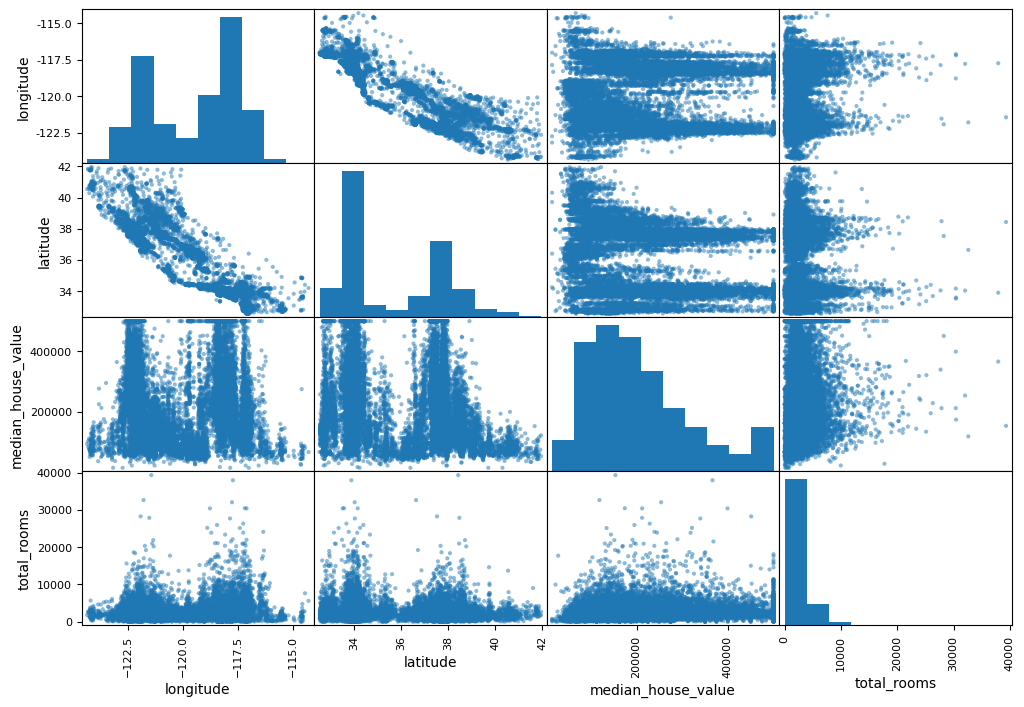

In [16]:
from pandas.plotting import scatter_matrix
attributes=['longitude','latitude','median_house_value','total_rooms']
scatter_matrix(df[attributes],figsize=(12,8))

# Data Preprocessing

### feature engineering

In [17]:
df['rooms_per_household'] = df['total_rooms'] / df['households'] 
df['rooms_per_bedroom'] = df['total_rooms'] / df['total_bedrooms']


In [18]:
df.drop(['households','total_bedrooms'],axis=1)

,longitude,latitude,housing_median_age,total_rooms,population,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,rooms_per_household,rooms_per_bedroom
0,-122.23,37.88,41.0,880.0,322.0,8.3252,452600.0,0.0,0.0,0.0,1.0,0.0,6.984127,6.821705
1,-122.22,37.86,21.0,7099.0,2401.0,8.3014,358500.0,0.0,0.0,0.0,1.0,0.0,6.238137,6.418626
2,-122.24,37.85,52.0,1467.0,496.0,7.2574,352100.0,0.0,0.0,0.0,1.0,0.0,8.288136,7.721053
3,-122.25,37.85,52.0,1274.0,558.0,5.6431,341300.0,0.0,0.0,0.0,1.0,0.0,5.817352,5.421277
4,-122.25,37.85,52.0,1627.0,565.0,3.8462,342200.0,0.0,0.0,0.0,1.0,0.0,6.281853,5.810714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,845.0,1.5603,78100.0,0.0,1.0,0.0,0.0,0.0,5.045455,4.451872
20636,-121.21,39.49,18.0,697.0,356.0,2.5568,77100.0,0.0,1.0,0.0,0.0,0.0,6.114035,4.646667
20637,-121.22,39.43,17.0,2254.0,1007.0,1.7000,92300.0,0.0,1.0,0.0,0.0,0.0,5.205543,4.647423
20638,-121.32,39.43,18.0,1860.0,741.0,1.8672,84700.0,0.0,1.0,0.0,0.0,0.0,5.329513,4.547677


<Axes: >

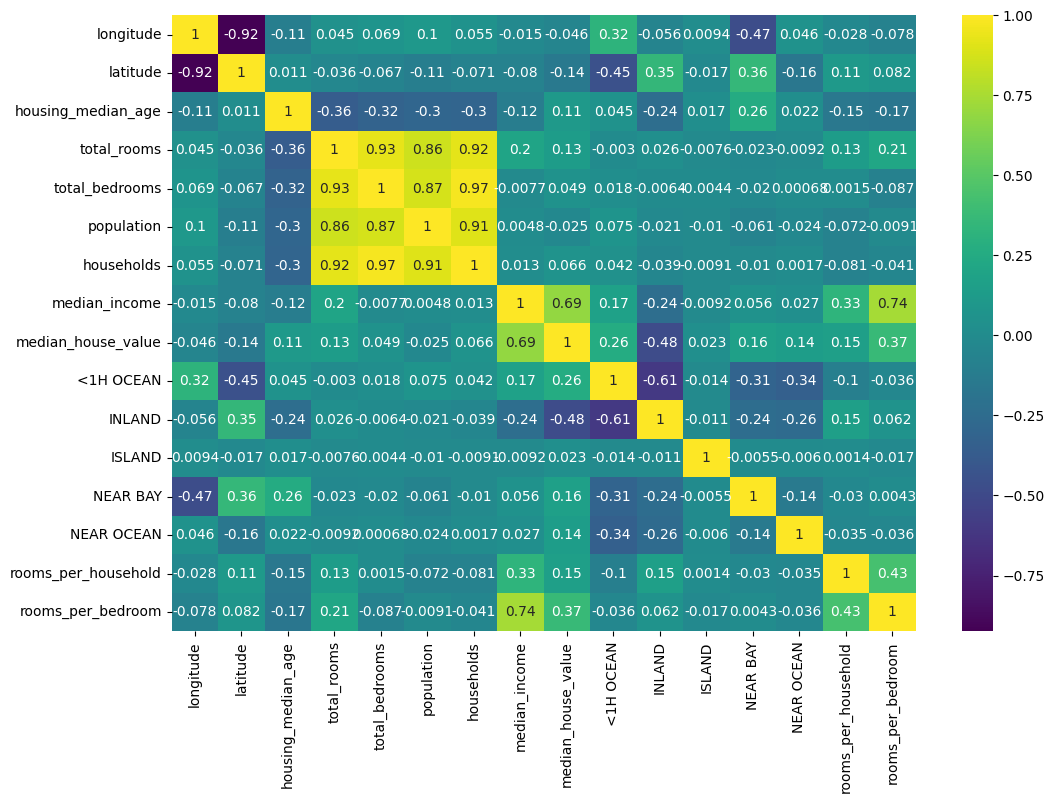

In [19]:
plt.figure(figsize=(12,8))
df.corr()                                                 #Correlation
sns.heatmap(df.corr(),annot=True,cmap='viridis')

In [20]:
x=df.drop(['median_house_value'],axis=1) #features
y=df['median_house_value']    #labels/Target variable

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [22]:
train_data=x_train.join(y_train)

In [23]:
x_train.shape

(16512, 15)

In [24]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 14196 to 15795
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   longitude            16512 non-null  float64
 1   latitude             16512 non-null  float64
 2   housing_median_age   16512 non-null  float64
 3   total_rooms          16512 non-null  float64
 4   total_bedrooms       16512 non-null  float64
 5   population           16512 non-null  float64
 6   households           16512 non-null  float64
 7   median_income        16512 non-null  float64
 8   <1H OCEAN            16512 non-null  float64
 9   INLAND               16512 non-null  float64
 10  ISLAND               16512 non-null  float64
 11  NEAR BAY             16512 non-null  float64
 12  NEAR OCEAN           16512 non-null  float64
 13  rooms_per_household  16512 non-null  float64
 14  rooms_per_bedroom    16512 non-null  float64
dtypes: float64(15)
memory usage: 2.5 MB


In [25]:
x_test.shape

(4128, 15)

In [26]:
y_train.shape

(16512,)

In [27]:
y_test.shape

(4128,)

<Axes: xlabel='latitude', ylabel='longitude'>

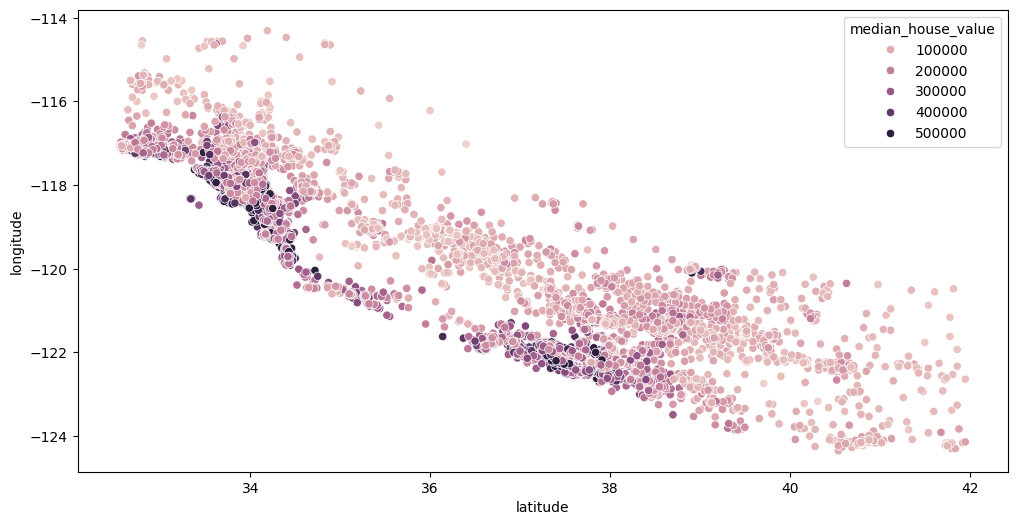

In [28]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='latitude',y='longitude',data=train_data,hue='median_house_value')

In [29]:
scaler=StandardScaler()
x_train_s=scaler.fit_transform(x_train)    #Scaling the features
x_test_s=scaler.transform(x_test)

## Training the model

In [30]:
model=LinearRegression()

In [31]:
#model = GradientBoostingRegressor(n_estimators=500,learning_rate=0.05,max_depth=6,random_state=42,subsample=0.8)
#from sklearn.ensemble import RandomForestRegressor

#model = RandomForestRegressor(
 #   n_estimators=500,
  #  random_state=42)

In [32]:
model.fit(x_train_s,y_train)     #training

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [33]:
y_pred=model.predict(x_test_s)    #testing the model

## Evaluating the model

In [34]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score


In [35]:
mae=mean_absolute_error(y_test,y_pred)
print('mae:',mae)

mae: 50840.9071753982


In [36]:
mse=mean_squared_error(y_test,y_pred)
print('mse:',mse)

mse: 4980575512.331291


In [37]:
rmse=np.sqrt(mse)
rmse

np.float64(70573.19258990124)

In [38]:
r2=r2_score(y_test,y_pred)
print('r2 score:',r2)

r2 score: 0.6199220552489466


## plot between actual and predicted prices

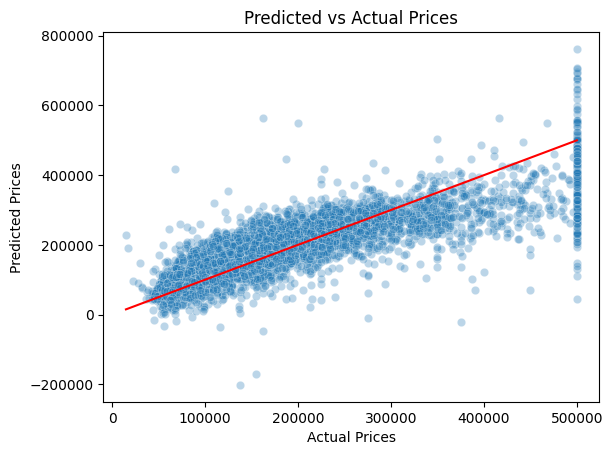

In [39]:
sns.scatterplot(x=y_test, y=y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()],[y_test.min(), y_test.max()],color='red')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Predicted vs Actual Prices")
plt.show()